In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit


irisData = load_iris()

In [2]:
dfData = pd.DataFrame(np.c_[irisData["data"],
                      irisData["target"]],
                      columns = irisData["feature_names"]+["target"])

In [3]:
stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

for train_index, test_index in stratSplit.split(dfData[irisData["feature_names"]], dfData["target"]):
    X_train = dfData[irisData["feature_names"]].iloc[train_index]
    X_test = dfData[irisData["feature_names"]].iloc[test_index]
    
    y_train = dfData["target"].iloc[train_index]
    y_test = dfData["target"].iloc[test_index]

In [4]:
from sklearn.linear_model import LogisticRegression

# solver liblinear for OvR, newton-cg, sag, saga, or lbfgs for multinomial loss
logReg_clf = LogisticRegression(multi_class="auto")  # auto, ovr, multinomial
logReg_clf.fit(X_train, y_train)

y_test_pred = logReg_clf.predict(X_test)

C:\Users\eequa\Anaconda3\envs\ai\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
print(logReg_clf.score(X_test,y_test))

1.0


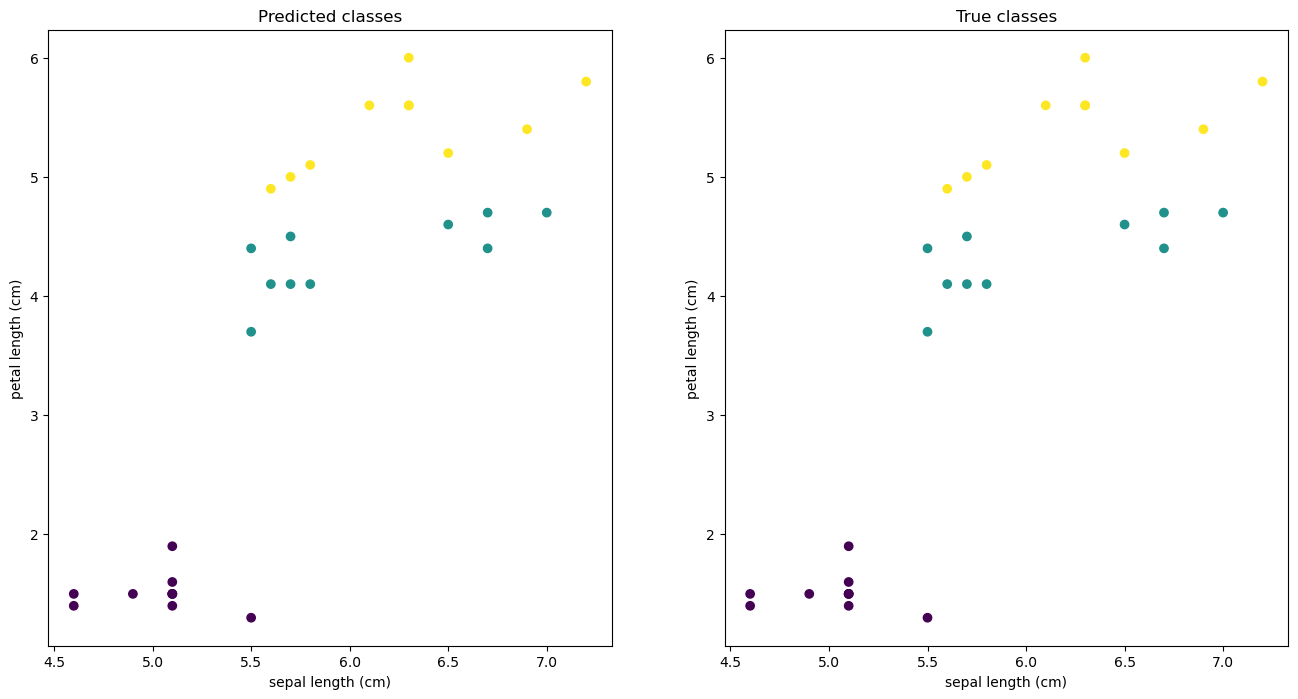

In [6]:
fig=plt.figure(figsize=(16,8))
ax = fig.add_subplot(121)
plt.title("Predicted classes")
ax.scatter(X_test["sepal length (cm)"], X_test["petal length (cm)"], c = y_test_pred)
plt.xlabel("sepal length (cm)")
plt.ylabel("petal length (cm)")
ax = fig.add_subplot(122)
plt.title("True classes")
ax.scatter(X_test["sepal length (cm)"], X_test["petal length (cm)"], c = y_test)
plt.xlabel("sepal length (cm)")
plt.ylabel("petal length (cm)")
plt.show()

C:\Users\eequa\Anaconda3\envs\ai\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


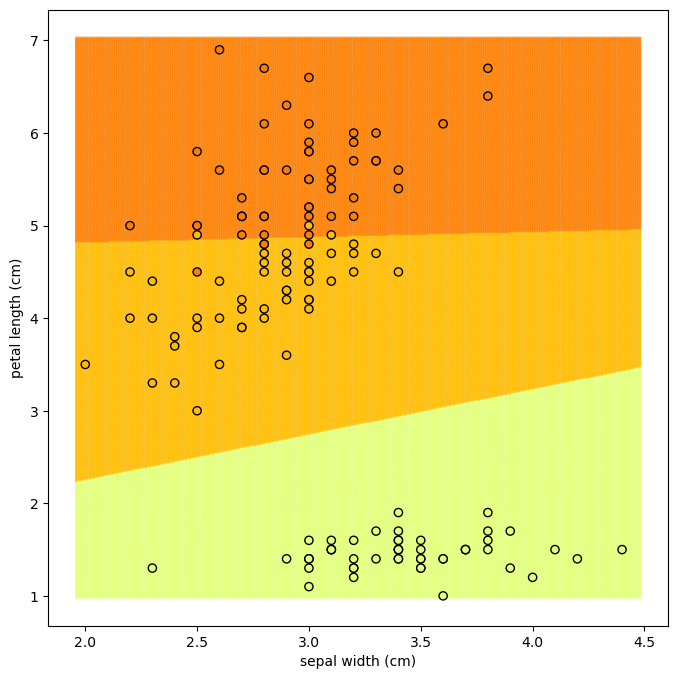

In [7]:
def make_meshgrid(x,y,sep=0.01):
    xMin = min(x) - min(x)/50
    xMax = max(x) + max(x)/50
    yMin = min(y) - min(y)/50
    yMax = max(y) + max(y)/50    
    
    return np.meshgrid(np.arange(xMin,xMax,sep), np.arange(yMin,yMax,sep))
    
dfData = pd.DataFrame(np.c_[irisData["data"], irisData["target"]],columns = irisData["feature_names"]+["target"])
    
fig = plt.figure(figsize=(8, 8))

xCol = "sepal width (cm)"
yCol = "petal length (cm)"
logReg_clf.fit(dfData[[xCol,yCol]], dfData["target"])
y_test_pred = logReg_clf.predict(dfData[[xCol, yCol]])
xx, yy = make_meshgrid(dfData[xCol], dfData[yCol], sep=0.01)

res = logReg_clf.predict(np.c_[xx.ravel(), yy.ravel()])
plt.scatter(xx.ravel(),
            yy.ravel(),
            c=res,
            s=1,
            cmap=plt.cm.Wistia,
            alpha=0.5)
plt.scatter(dfData[xCol],
            dfData[yCol],
            c=dfData['target'],
            cmap=plt.cm.Wistia,
            edgecolors="black",
            s=35)
plt.xlabel(xCol)
plt.ylabel(yCol)
plt.show()